#**K-Means Clustering Car Features and MSRP**

pada portofolio ini saya akan melakukan clustering pada dataset dari Car-features-and-MSRP menggunakan metode K-Means.
portofolio ini belum sempurna, mohon kritik dan saran supaya saya bisa menyempurnakan portofolio ini. 

#**Import Libraries**

In [352]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

#**Import Datasets**

pada bagian ini, saya melakukan import dataset Car Features and MSRP dari website kaggle : https://www.kaggle.com/datasets/CooperUnion/cardataset.
setelah di import, dilakukan beberapa data sample untuk sedikit mereview bagaimana 'bentuk' dan isi dari dataset yang ada.

In [353]:
df = pd.read_csv('Car_Features_and_MSRP.csv')

**Data Sample**

In [354]:
# sample 5 rows of the data
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1327,Suzuki,Aerio,2007,regular unleaded,155.0,4.0,AUTOMATIC,all wheel drive,4.0,NaN,Compact,Sedan,26,21,481,16299
5493,Dodge,Grand Caravan,2016,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Passenger Minivan,25,17,1851,25095
5756,Honda,HR-V,2016,regular unleaded,141.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,32,27,2202,21315
1392,BMW,ALPINA B7,2014,premium unleaded (required),540.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Factory Tuner,Luxury,High-Performance",Large,Sedan,25,16,3916,128300
4233,Suzuki,Esteem,2001,regular unleaded,122.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Wagon,30,26,481,14699


##**General Information & Missing Values**

Setelah mereview sekilas dataset diawal, dirasa ada beberapa fitur yang tidak terlalu bermanfaat, untuk itu fitur tersebut akan saya hilangkan dulu.

In [355]:
# drop fitur tidak terpakai :

df = df.drop(['Engine Fuel Type','Engine Cylinders','Market Category','highway MPG','Popularity'],axis = 1)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Transmission Type  11914 non-null  object 
 5   Driven_Wheels      11914 non-null  object 
 6   Number of Doors    11908 non-null  float64
 7   Vehicle Size       11914 non-null  object 
 8   Vehicle Style      11914 non-null  object 
 9   city mpg           11914 non-null  int64  
 10  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1024.0+ KB


bagian selanjutnya yang cukup penting untuk di observasi diawal adalah proses data cleaning yang didalamnya mencari missing value, mencari duplicate rows & columns, jika terdapat missing value & duplicate, akan dilakukan treatment seperlunya pada dataset.

In [357]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
city mpg              0
MSRP                  0
dtype: int64

In [358]:
(100.00 * df.isnull().sum()) / df.shape[0]

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine HP            0.579151
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.050361
Vehicle Size         0.000000
Vehicle Style        0.000000
city mpg             0.000000
MSRP                 0.000000
dtype: float64

terdapat missing value pada fitur Engine HP, Number of Doors. untuk fitur tersebut akan di drop rows. 

In [359]:
df = df.dropna(subset=['Engine HP','Number of Doors'])

In [360]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine HP            0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
city mpg             0
MSRP                 0
dtype: int64

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11844 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11844 non-null  object 
 1   Model              11844 non-null  object 
 2   Year               11844 non-null  int64  
 3   Engine HP          11844 non-null  float64
 4   Transmission Type  11844 non-null  object 
 5   Driven_Wheels      11844 non-null  object 
 6   Number of Doors    11844 non-null  float64
 7   Vehicle Size       11844 non-null  object 
 8   Vehicle Style      11844 non-null  object 
 9   city mpg           11844 non-null  int64  
 10  MSRP               11844 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


setelah missing value di drop, jumlah rows menjadi 11844. dengan jumlah kolom 11.

##**Duplicate Rows**

In [362]:
df.duplicated().sum()

801

setelah dicek terdeteksi adanya 801 duplicated rows. selanjutnya akan kami drop rows.

In [363]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (11844, 11)
Data Frame Dimension After Duplicate Removal: (11043, 11)


#**Statistical Summary**

pada bagian ini saya akan mengelompokkan kolom berdasarkan jenis datanya menjadi data categoricals & data numericals. tujuannya untuk mempermudah proses pada saat mereview statistik summary dan proeses analisis selanjutnya.

Sebelum melakukan statistical summary, saya akan merapihkan nama kolom supaya tidak ada spasi di nama kolom sehingga bisa mempermudah proses selanjutnya.

In [364]:
# rename nama kolom
df.rename(columns = {'Engine HP':'Engine_HP','Transmission Type':'Transmission_Type','Number of Doors':'Number_of_Doors',
                     'Vehicle Size':'Vehicle_Size','Vehicle Style':'Vehicle_Style','city mpg':'city_MPG'}, inplace = True)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11043 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11043 non-null  object 
 1   Model              11043 non-null  object 
 2   Year               11043 non-null  int64  
 3   Engine_HP          11043 non-null  float64
 4   Transmission_Type  11043 non-null  object 
 5   Driven_Wheels      11043 non-null  object 
 6   Number_of_Doors    11043 non-null  float64
 7   Vehicle_Size       11043 non-null  object 
 8   Vehicle_Style      11043 non-null  object 
 9   city_MPG           11043 non-null  int64  
 10  MSRP               11043 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.0+ MB


In [366]:
categoricals = ['Make', 'Model', 'Transmission_Type', 'Driven_Wheels', 'Vehicle_Size', 'Vehicle_Style']

numericals = ['Year', 'Engine_HP', 'Number_of_Doors','city_MPG','MSRP']

Summary data kategorik :  

In [367]:
df[categoricals].describe()

,Make,Model,Transmission_Type,Driven_Wheels,Vehicle_Size,Vehicle_Style
count,11043,11043,11043,11043,11043,11043
unique,47,910,5,4,3,16
top,Chevrolet,Silverado 1500,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1077,156,7828,4297,4358,2805


Observations:
1. Fitur Make & Model memiliki paling banyak unique value.
2. Fitur Transmission_Type memiliki 5 unique value : AUTOMATIC, MANUAL, AUTOMATED_MANUAL, DIRECT_DRIVE, UNKNOWN.
3. Fitur Driven_Wheels memiliki 4 unique values : Front wheel drive, rear wheel drive, all wheel drive, four wheel drive.
4. fitur Vehicle_size memiliki 3 unique values : Compact, Midsize, Large.
5. fitur Vehicle_style memiliki 16 unique values.


Summary data numerik :

In [368]:
df[numericals].describe()

,Year,Engine_HP,Number_of_Doors,city_MPG,MSRP
count,11043.000000,11043.000000,11043.000000,11043.000000,1.104300e+04
mean,2010.670289,252.569773,3.448882,19.414108,4.184572e+04
std,7.237156,109.840262,0.875407,7.220022,6.183163e+04
min,1990.000000,55.000000,2.000000,7.000000,2.000000e+03
25%,2007.000000,171.000000,2.000000,16.000000,2.149950e+04
50%,2015.000000,236.000000,4.000000,18.000000,3.050000e+04
75%,2016.000000,302.000000,4.000000,22.000000,4.288500e+04
max,2017.000000,1001.000000,4.000000,137.000000,2.065902e+06


Observation:
1. Kolom Year sebenarnya type data kategorikal, dengan nilai 1990-2017 (integer).
2. Number_of_Doors sebenarnya type data kategorikal, dengan nilai 2-4 (integer).
3. kelompok data numerik memiliki kecenderungan distribusi negatif & positif skew.
4. kolom EngineHP, city_MPG, dan MSRP memiliki distribusi positively skew, karena memiliki nilai Mean > 50%.
5. kolom Year & Number_of_Doors memiliki distribusi negatively skew, karena memiliki nilai Mean < 50%
6. keseluruhan, nilai minimum dan maksimumnya masih masuk akal.

#**Handle Outlier**

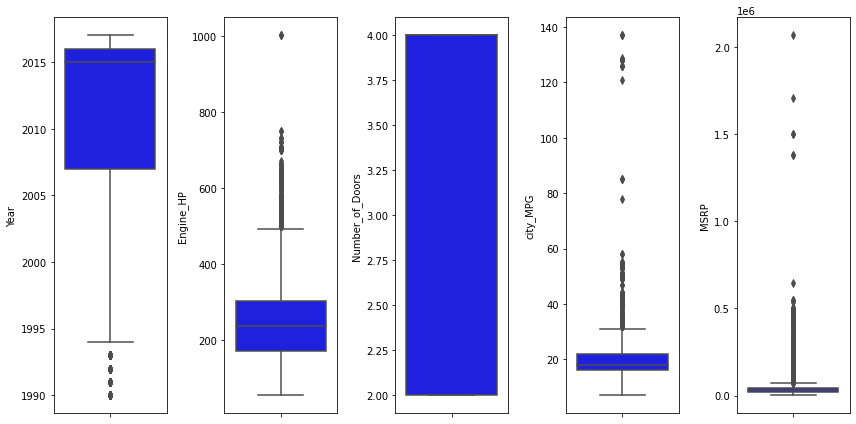

In [369]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

Obervation:

1. terdapat outlier pada fitur Year, Engine_HP, city_MPG, MSRP.
2. hanya fitur Number_of_doors yang tidak memiliki outlier.
3. tetapi kalau melihat dari spesifikasi lengkap merk dan tipe mobilnya, nilai outlier tersebut masih wajar.

##**Cek outlier fitur Year**

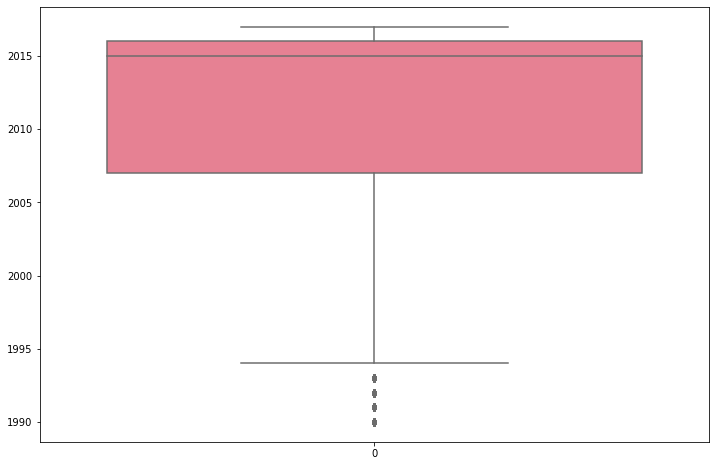

In [370]:
# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["Year"],palette="husl")
plt.show()

In [371]:
df['Year'].describe()

count    11043.000000
mean      2010.670289
std          7.237156
min       1990.000000
25%       2007.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: Year, dtype: float64

setelah melihat data Year, data terendah ada di tahun 1990 adalah wajar untuk tahun mobil. sehingga saya tidak akan mereduksi fitur Year.

##**Cek outlier fitur Engine_HP**

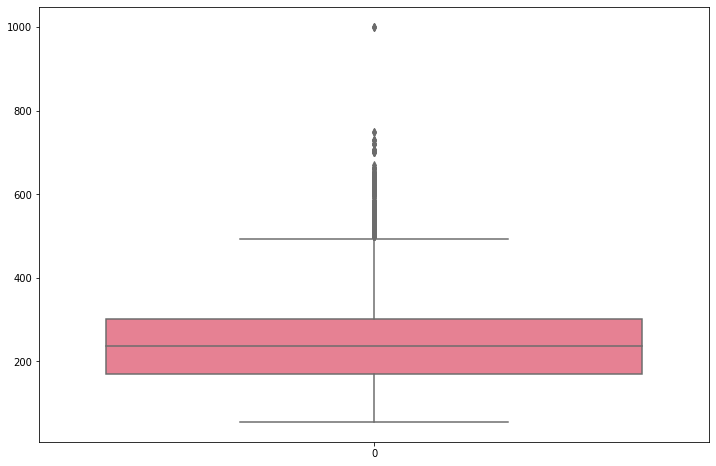

In [372]:
# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["Engine_HP"],palette="husl")
plt.show()

In [373]:
df['Engine_HP'].describe()

count    11043.000000
mean       252.569773
std        109.840262
min         55.000000
25%        171.000000
50%        236.000000
75%        302.000000
max       1001.000000
Name: Engine_HP, dtype: float64

In [374]:
# IQR Calculation and its boundary
Q1 = df["Engine_HP"].quantile(0.10)
Q3 = df["Engine_HP"].quantile(0.90)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df["Engine_HP"] >= lower_boundary) & (df["Engine_HP"] <= upper_boundary)

# Apply the filter
df = df[filter_logic]

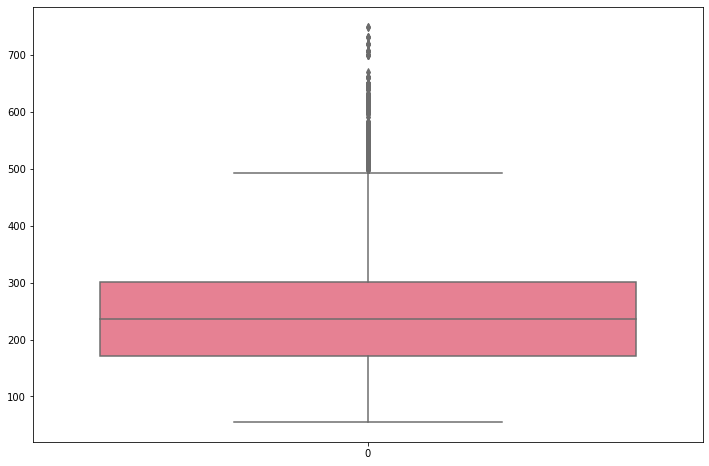

In [375]:
# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["Engine_HP"],palette="husl")
plt.show()

In [376]:
df['Engine_HP'].describe()

count    11040.000000
mean       252.366395
std        109.159942
min         55.000000
25%        171.000000
50%        236.000000
75%        302.000000
max        750.000000
Name: Engine_HP, dtype: float64

setelah dilakukan handle outlier pada fitur Engine_HP menggunakan metode IQR, maka dataframe tereduksi lagi menjadi 11040 rows.

##**Cek Outlier fitur city_MPG**

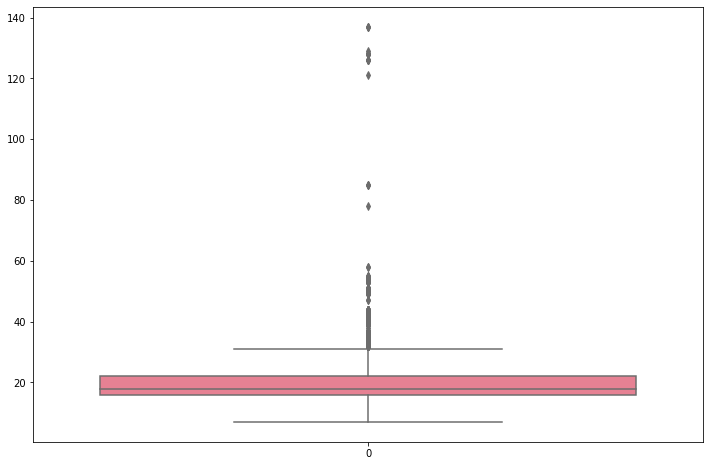

In [377]:
# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["city_MPG"],palette="husl")
plt.show()

In [378]:
df['city_MPG'].describe()

count    11040.00000
mean        19.41721
std          7.21855
min          7.00000
25%         16.00000
50%         18.00000
75%         22.00000
max        137.00000
Name: city_MPG, dtype: float64

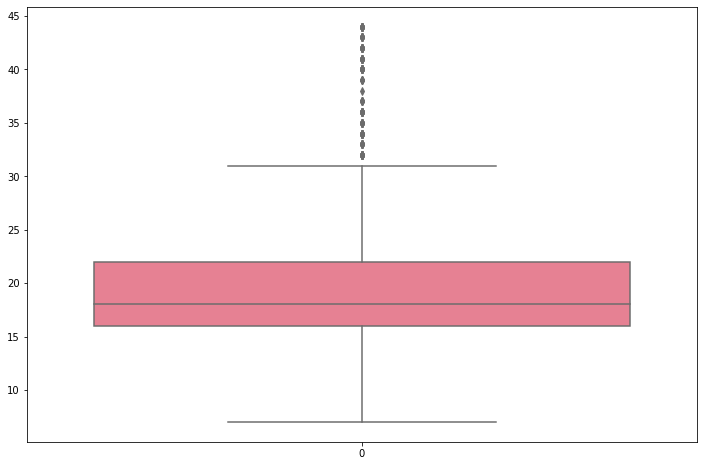

In [379]:
# IQR Calculation and its boundary
Q1 = df["city_MPG"].quantile(0.10)
Q3 = df["city_MPG"].quantile(0.90)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df["city_MPG"] >= lower_boundary) & (df["city_MPG"] <= upper_boundary)

# Apply the filter
df = df[filter_logic]

# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["city_MPG"],palette="husl")
plt.show()

In [380]:
df['city_MPG'].describe()

count    10972.000000
mean        19.076923
std          5.164923
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max         44.000000
Name: city_MPG, dtype: float64

setelah dilakukan handle outlier pada fitur city_MPG menggunakan metode IQR, maka dataframe tereduksi lagi menjadi 10972 rows.

##**Cek outlier fitur MSRP**

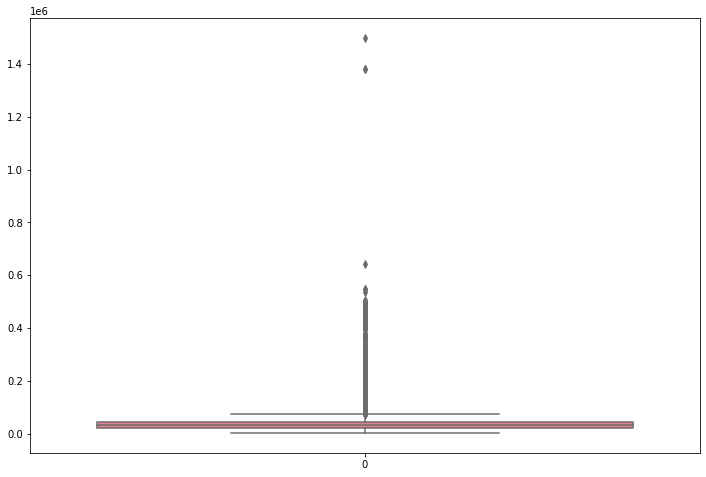

In [381]:
# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["MSRP"],palette="husl")
plt.show()

In [382]:
df['MSRP'].describe()

count    1.097200e+04
mean     4.145440e+04
std      5.501709e+04
min      2.000000e+03
25%      2.147500e+04
50%      3.054500e+04
75%      4.298875e+04
max      1.500000e+06
Name: MSRP, dtype: float64

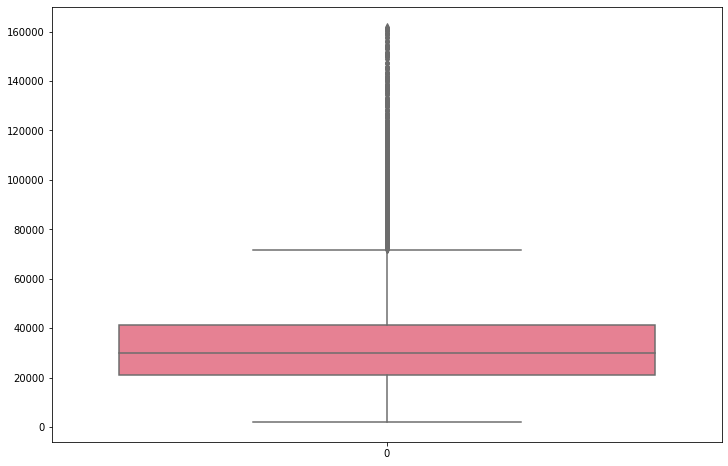

In [383]:
# IQR Calculation and its boundary
Q1 = df["MSRP"].quantile(0.10)
Q3 = df["MSRP"].quantile(0.90)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df["MSRP"] >= lower_boundary) & (df["MSRP"] <= upper_boundary)

# Apply the filter
df = df[filter_logic]

# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["MSRP"],palette="husl")
plt.show()

In [384]:
df['MSRP'].describe()

count     10605.000000
mean      33417.811598
std       23530.380318
min        2000.000000
25%       21095.000000
50%       29945.000000
75%       41340.000000
max      162000.000000
Name: MSRP, dtype: float64

setelah dilakukan handle outlier pada fitur MSRP menggunakan metode IQR, maka dataframe tereduksi lagi menjadi 10605 rows.

#**Distribution Form**

##**Numerical Columns**

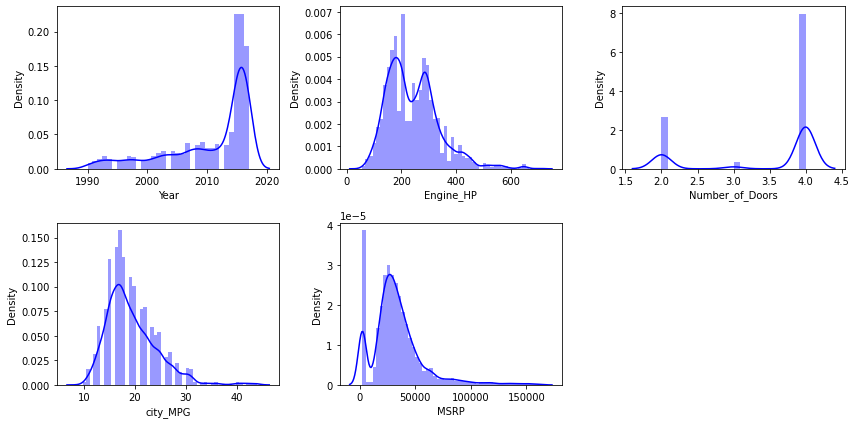

In [385]:
# KDE Plot

plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. fitur city_MPG hampir mendekati simetris.
2. fitur Year memiliki distribusi negatively skew. diduga karena mengikuti perkembangan produksi pabrikan yang dari tahun ke tahun memiliki tipe dan model yang semakin beragam.
3. fitur Engine_HP dan MSRP memiliki distribusi bimodal / distribusi dua puncak.
4. fitur Number_of_doors memiliki dstribusi Multinom / distribusi lebih dari 2 puncak.

##**Categorical Columns**

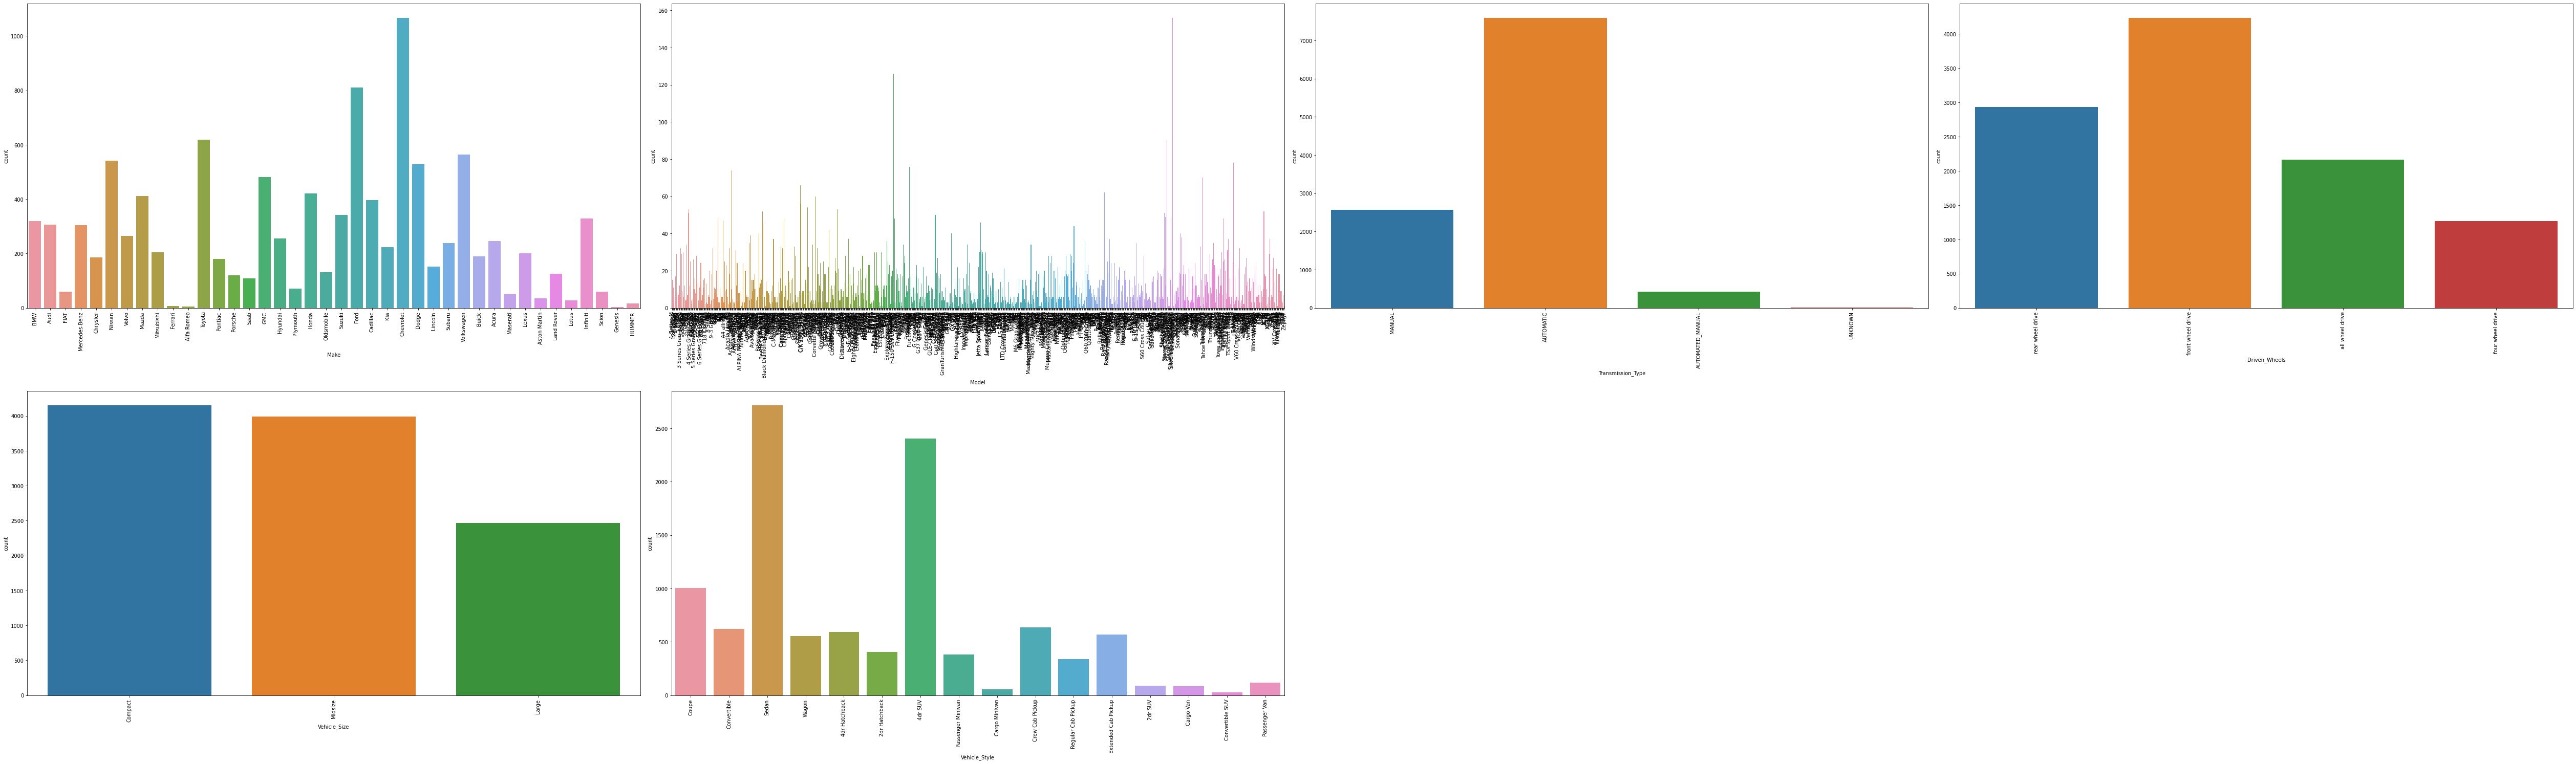

In [386]:
# Count Plot

plt.figure(figsize=(70,20))

features = categoricals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()
    plt.xticks(rotation=90)

Observation:
1. kolom Make memiliki 47 merek mobil. dengan 5 merek terbanyak ada pada merk Chevrolet, ford, Toyota, Volkswagen, Nissan.
2. kolom Model sulit di visualisasi karena terlalu banyak model/tipe pada masing-masing merk mobil.
3. kolom Transmission_Type : mayoritas adalah mobil dengan jenis transmisi Automated. sedangkan yang paling sedikit adalah mobil dengan jenis transmisi Direct drive, yang mungkin dikarenakan jenis transmisi tersebut hanya ada di mobil bermesin listrik yang belum semua merek memproduksi mobil listrik.
4. kolom driven_wheels : jenis penggerak mayoritas adalah front wheel drive. yang mungkin mengutamakan efisiensi.
5. kolom Vehicle_size : mayoritas jenis mobil compact & midsize.
6. kolom Vehicle_Style : Sedan & 4dr SUV menjadi mayoritas yang diproduksi pabrikan mobil.

#**Encoding**

In [387]:
df[categoricals].describe()

,Make,Model,Transmission_Type,Driven_Wheels,Vehicle_Size,Vehicle_Style
count,10605,10605,10605,10605,10605,10605
unique,40,826,4,4,3,16
top,Chevrolet,Silverado 1500,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1067,156,7593,4235,4151,2715


##**Encoding fitur Make**

untuk fitur Make akan digunakan frequency encoding

In [388]:
freq_mk = df['Make'].value_counts().reset_index()
freq_mk.rename(columns={'index': 'Make', 'Make': 'freq_Make'}, inplace = True)
freq_mk['pct_Make'] = round((freq_mk['freq_Make']/freq_mk['freq_Make'].sum())*100,2)

df = df.merge(freq_mk[['Make','pct_Make']], on='Make', how='inner')

df = df.drop(['Make'], axis=1)

df.head()

,Model,Year,Engine_HP,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,city_MPG,MSRP,pct_Make
0,1 Series M,2011,335.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,19,46135,3.02
1,1 Series,2011,300.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,40650,3.02
2,1 Series,2011,300.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,20,36350,3.02
3,1 Series,2011,230.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,18,29450,3.02
4,1 Series,2011,230.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,18,34500,3.02


##**Encoding fitur Model**

untuk fitur Model akan digunakan frequency encoding

In [389]:
freq_mdl = df['Model'].value_counts().reset_index()
freq_mdl.rename(columns={'index': 'Model', 'Model': 'freq_Model'}, inplace = True)
freq_mdl['pct_Model'] = round((freq_mdl['freq_Model']/freq_mdl['freq_Model'].sum())*100,2)

df = df.merge(freq_mdl[['Model','pct_Model']], on='Model', how='inner')

df = df.drop(['Model'], axis=1)

df.head()

,Year,Engine_HP,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,city_MPG,MSRP,pct_Make,pct_Model
0,2011,335.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,19,46135,3.02,0.01
1,2011,300.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,40650,3.02,0.14
2,2011,300.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,20,36350,3.02,0.14
3,2011,230.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,18,29450,3.02,0.14
4,2011,230.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,18,34500,3.02,0.14


##**Encoding fitur Transmission_Type**

untuk fitur Transmission_Type akan digunakan ordinal encoding

In [390]:
map_Transmission_Type = {'UNKNOWN':1,
                     'DIRECT_DRIVE':2,
                     'MANUAL':3,
                     'AUTOMATIC':4,
                     'AUTOMATED_MANUAL':5}
df['Transmission_Type_cat'] = df['Transmission_Type'].map(map_Transmission_Type)

df = df.drop(['Transmission_Type'], axis=1)

df.head()

,Year,Engine_HP,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,city_MPG,MSRP,pct_Make,pct_Model,Transmission_Type_cat
0,2011,335.0,rear wheel drive,2.0,Compact,Coupe,19,46135,3.02,0.01,3
1,2011,300.0,rear wheel drive,2.0,Compact,Convertible,19,40650,3.02,0.14,3
2,2011,300.0,rear wheel drive,2.0,Compact,Coupe,20,36350,3.02,0.14,3
3,2011,230.0,rear wheel drive,2.0,Compact,Coupe,18,29450,3.02,0.14,3
4,2011,230.0,rear wheel drive,2.0,Compact,Convertible,18,34500,3.02,0.14,3


In [391]:
df.Transmission_Type_cat.value_counts()

4    7593
3    2569
5     431
1      12
Name: Transmission_Type_cat, dtype: int64

##**Encoding fitur Driven_Wheels**

untuk fitur Driven_Wheels akan digunakan ordinal encoding

In [392]:
map_Driven_Wheels = {'all wheel drive':1,
                     'four wheel drive':2,
                     'rear wheel drive':3,
                     'front wheel drive':4
                     }
df['Driven_Wheels_cat'] = df['Driven_Wheels'].map(map_Driven_Wheels)

df = df.drop(['Driven_Wheels'], axis=1)

df.head()

,Year,Engine_HP,Number_of_Doors,Vehicle_Size,Vehicle_Style,city_MPG,MSRP,pct_Make,pct_Model,Transmission_Type_cat,Driven_Wheels_cat
0,2011,335.0,2.0,Compact,Coupe,19,46135,3.02,0.01,3,3
1,2011,300.0,2.0,Compact,Convertible,19,40650,3.02,0.14,3,3
2,2011,300.0,2.0,Compact,Coupe,20,36350,3.02,0.14,3,3
3,2011,230.0,2.0,Compact,Coupe,18,29450,3.02,0.14,3,3
4,2011,230.0,2.0,Compact,Convertible,18,34500,3.02,0.14,3,3


In [393]:
df.Driven_Wheels_cat.value_counts()

4    4235
3    2937
1    2166
2    1267
Name: Driven_Wheels_cat, dtype: int64

##**Encoding fitur Vehicle_Size**

untuk fitur Vehicle_Size akan digunakan ordinal encoding

In [394]:
map_Vehicle_Size = {'Compact':1,
                     'Midsize':2,
                     'Large':3}
df['Vehicle_Size_cat'] = df['Vehicle_Size'].map(map_Vehicle_Size)

df = df.drop(['Vehicle_Size'], axis=1)

df.head()

,Year,Engine_HP,Number_of_Doors,Vehicle_Style,city_MPG,MSRP,pct_Make,pct_Model,Transmission_Type_cat,Driven_Wheels_cat,Vehicle_Size_cat
0,2011,335.0,2.0,Coupe,19,46135,3.02,0.01,3,3,1
1,2011,300.0,2.0,Convertible,19,40650,3.02,0.14,3,3,1
2,2011,300.0,2.0,Coupe,20,36350,3.02,0.14,3,3,1
3,2011,230.0,2.0,Coupe,18,29450,3.02,0.14,3,3,1
4,2011,230.0,2.0,Convertible,18,34500,3.02,0.14,3,3,1


In [395]:
df.Vehicle_Size_cat.value_counts()

1    4151
2    3989
3    2465
Name: Vehicle_Size_cat, dtype: int64

##**Encoding fitur Vehicle_Style**

untuk fitur Vehicle_Style akan digunakan frequency encoding

In [396]:
freq_vs = df['Vehicle_Style'].value_counts().reset_index()
freq_vs.rename(columns={'index': 'Vehicle_Style', 'Vehicle_Style': 'freq_Vehicle_Style'}, inplace = True)
freq_vs['pct_Vehicle_Style'] = round((freq_vs['freq_Vehicle_Style']/freq_vs['freq_Vehicle_Style'].sum())*100,2)

df = df.merge(freq_vs[['Vehicle_Style','pct_Vehicle_Style']], on='Vehicle_Style', how='inner')

df = df.drop(['Vehicle_Style'], axis=1)

df.head()

,Year,Engine_HP,Number_of_Doors,city_MPG,MSRP,pct_Make,pct_Model,Transmission_Type_cat,Driven_Wheels_cat,Vehicle_Size_cat,pct_Vehicle_Style
0,2011,335.0,2.0,19,46135,3.02,0.01,3,3,1,9.5
1,2011,300.0,2.0,20,36350,3.02,0.14,3,3,1,9.5
2,2011,230.0,2.0,18,29450,3.02,0.14,3,3,1,9.5
3,2012,230.0,2.0,18,31200,3.02,0.14,3,3,1,9.5
4,2012,300.0,2.0,20,39300,3.02,0.14,3,3,1,9.5


In [397]:
df.pct_Vehicle_Style.value_counts()

25.60    2715
22.65    2402
9.50     1007
5.99      635
5.85      620
5.58      592
5.37      569
5.23      555
3.82      405
3.61      383
3.21      340
1.14      121
0.86       91
0.79       84
0.55       58
0.26       28
Name: pct_Vehicle_Style, dtype: int64

#**Scaling**

In [398]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df.astype(float))

#**Modelling**

In [399]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

df_data_std = pd.DataFrame(data=data_std, columns=list(df))

df_data_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

df.head()

,Year,Engine_HP,Number_of_Doors,city_MPG,MSRP,pct_Make,pct_Model,Transmission_Type_cat,Driven_Wheels_cat,Vehicle_Size_cat,pct_Vehicle_Style,clusters
0,2011,335.0,2.0,19,46135,3.02,0.01,3,3,1,9.5,3
1,2011,300.0,2.0,20,36350,3.02,0.14,3,3,1,9.5,3
2,2011,230.0,2.0,18,29450,3.02,0.14,3,3,1,9.5,3
3,2012,230.0,2.0,18,31200,3.02,0.14,3,3,1,9.5,3
4,2012,300.0,2.0,20,39300,3.02,0.14,3,3,1,9.5,3


#**Hyperparameter**

##**sum of squared error**

In [400]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

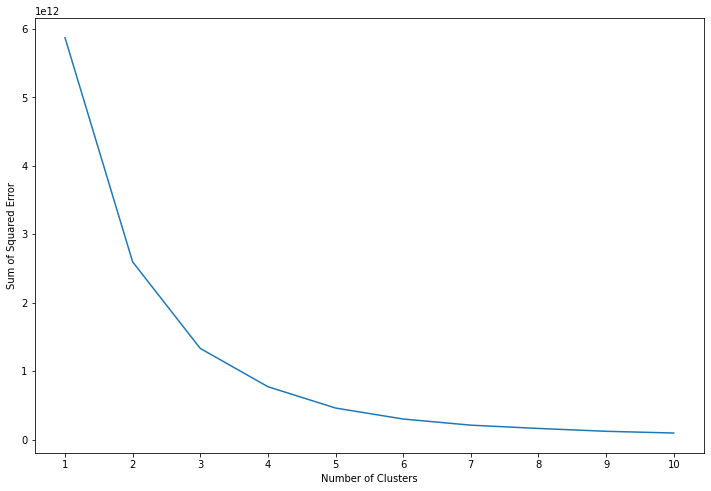

In [401]:
# draw the SSE decline progression
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

elbow point ada di K=3

##**K-Means**

In [402]:
# run kmeans with the optimal K
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# clusters' centroid analysis
df['cluster'] = kmeans.labels_
centroid_df = df.groupby('cluster')[['pct_Make', 'pct_Model', 'Year', 
                                     'Engine_HP', 'Transmission_Type_cat', 
                                     'Driven_Wheels_cat', 'Number_of_Doors','Vehicle_Size_cat',
                                     'city_MPG']].agg({'pct_Make': 'nunique',
                                                       'pct_Model': 'nunique', 
                                                       'Year':'mean',
                                                       'Engine_HP': 'mean', 
                                                       'Transmission_Type_cat':'mean',
                                                       'Driven_Wheels_cat': 'mean', 
                                                       'Number_of_Doors': 'mean',
                                                       'Vehicle_Size_cat':'mean',
                                                       'city_MPG':'mean'}).reset_index()
centroid_df = centroid_df.rename(columns = {'pct_Make':'pct_Model'})
centroid_df

,cluster,pct_Model,pct_Model,Year,Engine_HP,Transmission_Type_cat,Driven_Wheels_cat,Number_of_Doors,Vehicle_Size_cat,city_MPG
0,0,37,58,2013.899044,288.693943,3.953879,2.482465,3.621467,2.141339,18.327524
1,1,33,54,2007.198219,178.358158,3.639189,3.303203,3.400606,1.541785,20.673678
2,2,20,27,2014.407705,444.207063,3.914928,2.150883,3.085072,2.107544,15.438202


##**Insight**

setelah menyelesaikan semua proses, berikut insight yang bisa saya baca dari dataset ini. untuk clustering pada dataset ini yang terbaik dibagi menjadi 3 cluster. untuk karakteristik masing-masing cluster sebagai berkut : 

**cluster 0 : PREMIUM CAR** 

karakteristik : memiliki tenaga mesin sedang cenderung besar dengan konsumsi BBM tidak terlalu boros, sehingga masih nyaman untuk dipakai sehari-hari. memiliki ukuran mobil sedang ke besar dan memiliki penggerak roda 4wd atau rwd. karakter seperti ini biasanya berupa mobil keluarga mewah berukuran besar yang juga memiliki tenaga lumayan besar. 

**cluster 1 : CITY & COMPACT CAR**

karakteristik : memiliki tenaga mesin paling rendah supaya konsumsi BBM irit, biasanya memiliki penggerak roda rwd atau fwd, dan ukuran mobil kecil untuk commuter di dalam kota.

**cluster 2 : SPORT CAR & BIG SUV**

karakteristik : memiliki tenaga mesin besar, dengan penggerak roda awd atau 4wd, biasanya memiliki jumlah pintu sedikit, tidak mengutamakan efisiensi BBM tapi mengutamakan performa tinggi baik untuk offroad atau onroad. ukuran mobil midsize-large.